## Importação do Dataset

In [62]:
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

In [63]:
df= pd.read_csv("siga-empreendimentos-geracao.csv",encoding="ISO-8859-1", sep=";")

In [64]:
#método para mostrar todas as colunas e nenhuma ser omitida
pd.options.display.max_columns = None

## Análise Preliminar do Dataframe

In [65]:
df.head()

,DatGeracaoConjuntoDados,NomEmpreendimento,IdeNucleoCEG,CodCEG,SigUFPrincipal,SigTipoGeracao,DscFaseUsina,DscOrigemCombustivel,DscFonteCombustivel,DscTipoOutorga,NomFonteCombustivel,DatEntradaOperacao,MdaPotenciaOutorgadaKw,MdaPotenciaFiscalizadaKw,MdaGarantiaFisicaKw,IdcGeracaoQualificada,NumCoordNEmpreendimento,NumCoordEEmpreendimento,DatInicioVigencia,DatFimVigencia,DscPropriRegimePariticipacao,DscSubBacia,DscMuninicpios
0,2023-03-17,E,8,PCH.PH.MG.000008-6.1,MG,PCH,Operação,Hídrica,Potencial hidráulico,Autorização,Potencial hidráulico,1953-11-20,"1400,00",1400,",00",Não,"-20,12479858","-43,87020250",2000-07-07,2030-07-07,100% para ANGLOGOLD ASHANTI CÓRREGO DO SÍTIO M...,41 - Das Velhas - Sao Francisco,Nova Lima - MG
1,2023-03-17,F,9,PCH.PH.MG.000009-4.1,MG,PCH,Operação,Hídrica,Potencial hidráulico,Autorização,Potencial hidráulico,1953-11-20,"3972,00",3972,",00",Não,"-20,13187300","-43,87693500",2000-07-07,2030-07-07,100% para ANGLOGOLD ASHANTI CÓRREGO DO SÍTIO M...,41 - Das Velhas - Sao Francisco,Nova Lima - MG
2,2023-03-17,G,10,PCH.PH.MG.000010-8.1,MG,PCH,Operação,Hídrica,Potencial hidráulico,Autorização,Potencial hidráulico,1937-01-01,"1440,00",1440,",00",Não,"-20,13754468","-43,89192620",2000-08-31,2030-08-31,100% para ANGLOGOLD ASHANTI CÓRREGO DO SÍTIO M...,41 - Das Velhas - Sao Francisco,Nova Lima - MG
3,2023-03-17,14 de Julho,12,UHE.PH.RS.000012-4.1,RS,UHE,Operação,Hídrica,Potencial hidráulico,Concessão,Potencial hidráulico,2008-12-25,"100000,00",100000,"45200,00",Não,"-29,06475278","-51,67494167",2001-03-15,2039-11-13,100% para COMPANHIA ENERGÉTICA RIO DAS ANTAS (...,86 - Taquari,"Bento Gonçalves - RS, Cotiporã - RS"
4,2023-03-17,Abaúna,15,CGH.PH.RS.000015-9.1,RS,CGH,Operação,Hídrica,Potencial hidráulico,Registro,Potencial hidráulico,2000-10-15,"720,00",720,"510,00",Não,"-27,82377500","-52,06999722",NaN,NaN,100% para Cooperativa de Geração de Energia e ...,"72 - Uruguai, Inhanduva, Peixe e outros",Floriano Peixoto - RS


In [66]:
print(df.columns)

Index(['DatGeracaoConjuntoDados', 'NomEmpreendimento', 'IdeNucleoCEG',
       'CodCEG', 'SigUFPrincipal', 'SigTipoGeracao', 'DscFaseUsina',
       'DscOrigemCombustivel', 'DscFonteCombustivel', 'DscTipoOutorga',
       'NomFonteCombustivel', 'DatEntradaOperacao', 'MdaPotenciaOutorgadaKw',
       'MdaPotenciaFiscalizadaKw', 'MdaGarantiaFisicaKw',
       'IdcGeracaoQualificada', 'NumCoordNEmpreendimento',
       'NumCoordEEmpreendimento', 'DatInicioVigencia', 'DatFimVigencia',
       'DscPropriRegimePariticipacao', 'DscSubBacia', 'DscMuninicpios'],
      dtype='object')


In [67]:
#mudando a ordem das colunas para facilitar a visualização do dados
new_order_colunm = [ 'NomEmpreendimento','SigUFPrincipal', 'SigTipoGeracao', 
       'DscOrigemCombustivel', 'DscFonteCombustivel', 
       'NomFonteCombustivel', 'MdaPotenciaOutorgadaKw',
       'MdaPotenciaFiscalizadaKw', 'MdaGarantiaFisicaKw','DscFaseUsina','DscSubBacia',
        'DatEntradaOperacao','DatInicioVigencia','DatFimVigencia',
       'NumCoordNEmpreendimento', 'NumCoordEEmpreendimento','DscTipoOutorga',
       'DscPropriRegimePariticipacao', 'DscMuninicpios','IdeNucleoCEG','CodCEG',
       'IdcGeracaoQualificada',
       'DatGeracaoConjuntoDados']
df = df[new_order_colunm]

In [68]:
#escolha de elementos aleatorios
df.sample(3)

,NomEmpreendimento,SigUFPrincipal,SigTipoGeracao,DscOrigemCombustivel,DscFonteCombustivel,NomFonteCombustivel,MdaPotenciaOutorgadaKw,MdaPotenciaFiscalizadaKw,MdaGarantiaFisicaKw,DscFaseUsina,DscSubBacia,DatEntradaOperacao,DatInicioVigencia,DatFimVigencia,NumCoordNEmpreendimento,NumCoordEEmpreendimento,DscTipoOutorga,DscPropriRegimePariticipacao,DscMuninicpios,IdeNucleoCEG,CodCEG,IdcGeracaoQualificada,DatGeracaoConjuntoDados
7244,Wercles Vieira Vilela,PA,UFV,Solar,Radiação solar,Radiação solar,"1,00",1,",00",Operação,NaN,2018-01-19,NaN,NaN,"-1,60362000","-52,68014000",Registro,100% para EQUATORIAL PARÁ DISTRIBUIDORA DE ENE...,Porto de Moz - PA,39655,UFV.RS.PA.039655-9.1,NaN,2023-03-17
13891,Francisco de Oliveira Caudas,PA,UFV,Solar,Radiação solar,Radiação solar,"1,00",1,",00",Operação,NaN,2021-12-22,NaN,NaN,"-1,81634700","-51,24213400",Registro,100% para EQUATORIAL PARÁ DISTRIBUIDORA DE ENE...,Portel - PA,58818,UFV.RS.PA.058818-0.1,NaN,2023-03-17
22248,Luiz Miller Evangelista Vasconcelos,PA,UFV,Solar,Radiação solar,Radiação solar,"1,00",1,",00",Operação,NaN,2022-07-25,NaN,NaN,"-1,78586200","-50,22504300",Registro,100% para EQUATORIAL PARÁ DISTRIBUIDORA DE ENE...,Curralinho - PA,67856,UFV.RS.PA.067856-2.1,NaN,2023-03-17


In [69]:
#comando retorna a quantidade de linhas e colunas (linhas, colunas)
df.shape

(24600, 23)

In [70]:
print(df['NomFonteCombustivel'].unique())

['Potencial hidráulico' 'Gás de Alto Forno - CM' 'Óleo Diesel'
 'Bagaço de Cana de Açúcar' 'Gás Natural' 'Urânio' 'Licor Negro'
 'Óleo Combustível' 'Calor de Processo - CM'
 'Outros Energéticos de Petróleo' 'Carvão Mineral' 'Resíduos Florestais'
 'Calor de Processo - GN' 'Gás de Refinaria' 'Biogás - RU'
 'Cinética do vento' 'Lenha' 'Casca de Arroz' 'Radiação solar'
 'Carvão Vegetal' 'Gás de Alto Forno - PE' 'Gás de Alto Forno - Biomassa'
 'Calor de Processo - OF' 'Biogás - RA' 'Capim Elefante' 'Óleos vegetais'
 'Biogás-AGR' 'Resíduos Sólidos Urbanos - RU' 'Biogás - Floresta' 'Etanol'
 'Carvão - RU']


In [71]:
if isinstance(df.index, pd.DatetimeIndex):
    print("A série é uma série temporal")
else:
    print("A série não é uma série temporal")

A série não é uma série temporal


**Saber se todos os Estado estão presentes no dataset e a quantidade de cidades catalogadas**

In [72]:
df['SigUFPrincipal'].nunique()

27

In [73]:
df['SigUFPrincipal'].unique()

array(['MG', 'RS', 'SC', 'TO', 'RR', 'MT', 'SP', 'ES', 'RO', 'AM', 'RJ',
       'PR', 'CE', 'BA', 'MA', 'PI', 'AL', 'GO', 'PB', 'AP', 'MS', 'PE',
       'PA', 'DF', 'SE', 'RN', 'AC'], dtype=object)

In [74]:
df['DscMuninicpios'].nunique()

2082

**Saber maior valor presente no dataframe**

In [75]:
maior_pot = df['MdaPotenciaFiscalizadaKw'].idxmax()
print(df.loc[maior_pot])

NomEmpreendimento                                         Belo Monte
SigUFPrincipal                                                    PA
SigTipoGeracao                                                   UHE
DscOrigemCombustivel                                         Hídrica
DscFonteCombustivel                             Potencial hidráulico
NomFonteCombustivel                             Potencial hidráulico
MdaPotenciaOutorgadaKw                                   11233100,00
MdaPotenciaFiscalizadaKw                                    11233100
MdaGarantiaFisicaKw                                       4418900,00
DscFaseUsina                                                Operação
DscSubBacia                                        18 - Xingu e Paru
DatEntradaOperacao                                        2016-04-20
DatInicioVigencia                                         2010-08-26
DatFimVigencia                                            2045-08-26
NumCoordNEmpreendimento           

**Saber os tipos de dados das variáveis para saber quais devem ser corrigidos**

In [76]:
df.dtypes

NomEmpreendimento               object
SigUFPrincipal                  object
SigTipoGeracao                  object
DscOrigemCombustivel            object
DscFonteCombustivel             object
NomFonteCombustivel             object
MdaPotenciaOutorgadaKw          object
MdaPotenciaFiscalizadaKw         int64
MdaGarantiaFisicaKw             object
DscFaseUsina                    object
DscSubBacia                     object
DatEntradaOperacao              object
DatInicioVigencia               object
DatFimVigencia                  object
NumCoordNEmpreendimento         object
NumCoordEEmpreendimento         object
DscTipoOutorga                  object
DscPropriRegimePariticipacao    object
DscMuninicpios                  object
IdeNucleoCEG                     int64
CodCEG                          object
IdcGeracaoQualificada           object
DatGeracaoConjuntoDados         object
dtype: object

## Data Cleaning

### Transformando os tipos de dados

**As potências estão com o tipo object, devem ser convertidas para o tipo float paraconseguir trabalhar com esses dados**

In [77]:
df['MdaPotenciaFiscalizadaKw'] = df['MdaPotenciaFiscalizadaKw'].astype(float)

In [78]:
df['MdaPotenciaOutorgadaKw'] = df['MdaPotenciaOutorgadaKw'].str.replace(',', '.')
df['MdaPotenciaOutorgadaKw'] = df['MdaPotenciaOutorgadaKw'].astype(float)


In [79]:
df['MdaGarantiaFisicaKw'] = df['MdaGarantiaFisicaKw'].str.replace(',00', '.00')
df['MdaGarantiaFisicaKw'] = df['MdaGarantiaFisicaKw'].astype(float)

**As data também devem ser alteradas para o tipo datatime**

In [80]:
df['DatEntradaOperacao'] = pd.to_datetime(df['DatEntradaOperacao'], format='%Y/%m/%d')
df['DatInicioVigencia'] = pd.to_datetime(df['DatInicioVigencia'], format='%Y/%m/%d')
df['DatFimVigencia'] = pd.to_datetime(df['DatFimVigencia'], format='%Y/%m/%d')

In [81]:
#verificando se as alterações deram certo
df.dtypes

NomEmpreendimento                       object
SigUFPrincipal                          object
SigTipoGeracao                          object
DscOrigemCombustivel                    object
DscFonteCombustivel                     object
NomFonteCombustivel                     object
MdaPotenciaOutorgadaKw                 float64
MdaPotenciaFiscalizadaKw               float64
MdaGarantiaFisicaKw                    float64
DscFaseUsina                            object
DscSubBacia                             object
DatEntradaOperacao              datetime64[ns]
DatInicioVigencia               datetime64[ns]
DatFimVigencia                  datetime64[ns]
NumCoordNEmpreendimento                 object
NumCoordEEmpreendimento                 object
DscTipoOutorga                          object
DscPropriRegimePariticipacao            object
DscMuninicpios                          object
IdeNucleoCEG                             int64
CodCEG                                  object
IdcGeracaoQua

**Considerar apenas os empreendimento em operação para ser mais coerente os cálculos**

In [82]:
df['DscFaseUsina'].unique()

array(['Operação', 'Construção não iniciada', 'Construção'], dtype=object)

In [83]:
df[df['DscFaseUsina'].str.lower() != 'operação']['DscFaseUsina'].value_counts()

Construção não iniciada    2436
Construção                  342
Name: DscFaseUsina, dtype: int64

In [84]:
df = df[df['DscFaseUsina'].str.lower() == 'operação']

In [85]:
df.sample(6)

,NomEmpreendimento,SigUFPrincipal,SigTipoGeracao,DscOrigemCombustivel,DscFonteCombustivel,NomFonteCombustivel,MdaPotenciaOutorgadaKw,MdaPotenciaFiscalizadaKw,MdaGarantiaFisicaKw,DscFaseUsina,DscSubBacia,DatEntradaOperacao,DatInicioVigencia,DatFimVigencia,NumCoordNEmpreendimento,NumCoordEEmpreendimento,DscTipoOutorga,DscPropriRegimePariticipacao,DscMuninicpios,IdeNucleoCEG,CodCEG,IdcGeracaoQualificada,DatGeracaoConjuntoDados
9662,Marciel de Castro Pereira,PA,UFV,Solar,Radiação solar,Radiação solar,1.00,1.00,0.00,Operação,NaN,2019-09-27,NaT,NaT,"-3,89639600","-49,76355900",Registro,100% para EQUATORIAL PARÁ DISTRIBUIDORA DE ENE...,Tucuruí - PA,46033,UFV.RS.PA.046033-8.1,NaN,2023-03-17
12805,Maria Farias Maia,PA,UFV,Solar,Radiação solar,Radiação solar,1.00,1.00,0.00,Operação,NaN,2021-10-19,NaT,NaT,"-1,82061083","-51,10613389",Registro,100% para EQUATORIAL PARÁ DISTRIBUIDORA DE ENE...,Portel - PA,57440,UFV.RS.PA.057440-6.1,NaN,2023-03-17
7648,Benedito Rodrigues Dos Santos,PA,UFV,Solar,Radiação solar,Radiação solar,1.00,1.00,0.00,Operação,NaN,2018-02-02,NaT,NaT,"-2,15919000","-52,78393000",Registro,100% para EQUATORIAL PARÁ DISTRIBUIDORA DE ENE...,Porto de Moz - PA,40059,UFV.RS.PA.040059-9.1,NaN,2023-03-17
14353,Sandro Rocha Farias Junior,PA,UFV,Solar,Radiação solar,Radiação solar,1.00,1.00,0.00,Operação,NaN,2021-11-19,NaT,NaT,"-2,33472400","-50,94887300",Registro,100% para EQUATORIAL PARÁ DISTRIBUIDORA DE ENE...,Portel - PA,59288,UFV.RS.PA.059288-9.1,NaN,2023-03-17
13195,Orimar Pinheiro de Miranda Cruz,PA,UFV,Solar,Radiação solar,Radiação solar,1.00,1.00,0.00,Operação,NaN,2021-10-29,NaT,NaT,"-2,10581833","-50,99794889",Registro,100% para EQUATORIAL PARÁ DISTRIBUIDORA DE ENE...,Portel - PA,57830,UFV.RS.PA.057830-4.1,NaN,2023-03-17
23473,10658,MS,UFV,Solar,Radiação solar,Radiação solar,1.38,1.00,0.00,Operação,NaN,2022-10-07,NaT,NaT,"-19,44046000","-56,51984000",Registro,100% para ENERGISA MATO GROSSO DO SUL - DISTRI...,Corumbá - MS,70642,UFV.RS.MS.070642-6.1,NaN,2023-03-17


In [86]:
df.shape

(21822, 23)

### Dados Nulos

Dados nulos podem interferir no resultado e por isso devem ser manipulados. 

In [87]:
print('Quantidade de dados nulos: ', df.isna().sum().sum())

Quantidade de dados nulos:  75140


In [88]:
#isnull() e isna() são equivalentes, ambas retornam boleanos para valores nulos (NaN - not a number) 
#sum() contabiliza os nulos
df.isnull().sum()

NomEmpreendimento                   0
SigUFPrincipal                      0
SigTipoGeracao                      0
DscOrigemCombustivel                0
DscFonteCombustivel                 0
NomFonteCombustivel                 0
MdaPotenciaOutorgadaKw              0
MdaPotenciaFiscalizadaKw            0
MdaGarantiaFisicaKw                 0
DscFaseUsina                        0
DscSubBacia                     20461
DatEntradaOperacao                  0
DatInicioVigencia               19317
DatFimVigencia                  19326
NumCoordNEmpreendimento             0
NumCoordEEmpreendimento             0
DscTipoOutorga                      0
DscPropriRegimePariticipacao        0
DscMuninicpios                      0
IdeNucleoCEG                        0
CodCEG                              0
IdcGeracaoQualificada           16036
DatGeracaoConjuntoDados             0
dtype: int64

In [89]:
df['IdcGeracaoQualificada'].unique()

array(['Não', 'Sim', nan], dtype=object)

In [90]:
df['DatInicioVigencia'].unique()

array(['2000-07-07T00:00:00.000000000', '2000-08-31T00:00:00.000000000',
       '2001-03-15T00:00:00.000000000', ...,
       '2021-11-09T00:00:00.000000000', '2021-11-25T00:00:00.000000000',
       '2022-03-21T00:00:00.000000000'], dtype='datetime64[ns]')

Para realizar a manupulação dos dados nulos optou-se por substituir por um valor conhecido de mesmo tipo. Se optasse por excluir as linhas, a maioria seria eliminada e impactaria muito no resultado.

In [91]:
#usando metodo loc para subistituir NaN por valores padrões; Foi escolhido valores similiares ao tipo de dados.
df.loc[df['IdcGeracaoQualificada'].isnull(),'IdcGeracaoQualificada']= 'Other'
df.loc[df['DatInicioVigencia'].isnull(),'DatInicioVigencia']= '2023-01-01'
df.loc[df['DatFimVigencia'].isnull(),'DatFimVigencia']= '2023-01-01'
df.loc[df['DscSubBacia'].isnull(),'DscSubBacia']= '00 - sem identificacao'

In [92]:
#pode-se ver que foi substituido os NaN por valores padrões
df.sample(8)

,NomEmpreendimento,SigUFPrincipal,SigTipoGeracao,DscOrigemCombustivel,DscFonteCombustivel,NomFonteCombustivel,MdaPotenciaOutorgadaKw,MdaPotenciaFiscalizadaKw,MdaGarantiaFisicaKw,DscFaseUsina,DscSubBacia,DatEntradaOperacao,DatInicioVigencia,DatFimVigencia,NumCoordNEmpreendimento,NumCoordEEmpreendimento,DscTipoOutorga,DscPropriRegimePariticipacao,DscMuninicpios,IdeNucleoCEG,CodCEG,IdcGeracaoQualificada,DatGeracaoConjuntoDados
23781,Maria de Nazare Viana de Lima,PA,UFV,Solar,Radiação solar,Radiação solar,1.00,1.00,0.00,Operação,00 - sem identificacao,2022-09-22,2023-01-01,2023-01-01,"-1,95569400","-51,13865600",Registro,100% para EQUATORIAL PARÁ DISTRIBUIDORA DE ENE...,Portel - PA,70950,UFV.RS.PA.070950-6.1,Other,2023-03-17
17357,Leniete Rodrigues Braga,PA,UFV,Solar,Radiação solar,Radiação solar,1.00,1.00,0.00,Operação,00 - sem identificacao,2022-02-26,2023-01-01,2023-01-01,"-2,20005400","-50,80298600",Registro,100% para EQUATORIAL PARÁ DISTRIBUIDORA DE ENE...,Portel - PA,62765,UFV.RS.PA.062765-8.1,Other,2023-03-17
13013,Olivaldo Gomes da Costa,PA,UFV,Solar,Radiação solar,Radiação solar,1.00,1.00,0.00,Operação,00 - sem identificacao,2021-10-27,2023-01-01,2023-01-01,"-2,08014528","-50,98939694",Registro,100% para EQUATORIAL PARÁ DISTRIBUIDORA DE ENE...,Portel - PA,57648,UFV.RS.PA.057648-4.1,Other,2023-03-17
7089,Rosiane Barbosa Duarte,PA,UFV,Solar,Radiação solar,Radiação solar,1.00,1.00,0.00,Operação,00 - sem identificacao,2018-03-05,2023-01-01,2023-01-01,"-2,06200000","-52,30214000",Registro,100% para EQUATORIAL PARÁ DISTRIBUIDORA DE ENE...,Porto de Moz - PA,39500,UFV.RS.PA.039500-5.1,Other,2023-03-17
2714,DPR Indústria,SC,UTE,Fóssil,Petróleo,Óleo Diesel,265.00,265.00,0.00,Operação,00 - sem identificacao,2012-01-28,2023-01-01,2023-01-01,"-27,24138876","-48,63361102",Registro,100% para DPR Indústria Ltda-ME (REG),Tijucas - SC,30737,UTE.PE.SC.030737-8.1,Não,2023-03-17
4106,Adição Distribuição Express - L07,MG,UTE,Fóssil,Petróleo,Óleo Diesel,576.00,576.00,0.00,Operação,00 - sem identificacao,2009-12-01,2023-01-01,2023-01-01,"-20,14327778","-44,89972222",Registro,100% para Adição Distribuição Express Ltda. (REG),Divinópolis - MG,33095,UTE.PE.MG.033095-7.1,Não,2023-03-17
1594,Rio Funchal,MG,CGH,Hídrica,Potencial hidráulico,Potencial hidráulico,"1,000.00","1,000.00",0.00,Operação,"40 - Alto Sao Francisco, ate Tres Marias",1900-01-03,2023-01-01,2023-01-01,"-19,41805556","-45,99166667",Registro,100% para Construtora Sklar Empreendimentos Ge...,São Gotardo - MG,29389,CGH.PH.MG.029389-0.1,Não,2023-03-17
13674,Graciney Costa da Silva,PA,UFV,Solar,Radiação solar,Radiação solar,1.00,1.00,0.00,Operação,00 - sem identificacao,2021-12-15,2023-01-01,2023-01-01,"-2,60644500","-50,71495600",Registro,100% para EQUATORIAL PARÁ DISTRIBUIDORA DE ENE...,Portel - PA,58601,UFV.RS.PA.058601-3.1,Other,2023-03-17


In [93]:
#verificando se deu certo a substituição dos dados nulos
df.isnull().sum()

NomEmpreendimento               0
SigUFPrincipal                  0
SigTipoGeracao                  0
DscOrigemCombustivel            0
DscFonteCombustivel             0
NomFonteCombustivel             0
MdaPotenciaOutorgadaKw          0
MdaPotenciaFiscalizadaKw        0
MdaGarantiaFisicaKw             0
DscFaseUsina                    0
DscSubBacia                     0
DatEntradaOperacao              0
DatInicioVigencia               0
DatFimVigencia                  0
NumCoordNEmpreendimento         0
NumCoordEEmpreendimento         0
DscTipoOutorga                  0
DscPropriRegimePariticipacao    0
DscMuninicpios                  0
IdeNucleoCEG                    0
CodCEG                          0
IdcGeracaoQualificada           0
DatGeracaoConjuntoDados         0
dtype: int64

Verificando os valores outliers. Nesse caso é a usina de Belo Monte que tem uma potência física garantida muito superior a qualquer outra usina. Nesse caso não pode excluir ou manipular esse outlier por ser um valor real e importante.

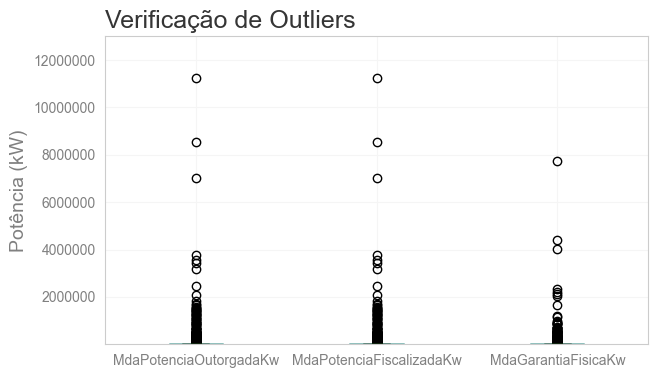

In [94]:
#outlier
ax = df.boxplot(column=['MdaPotenciaOutorgadaKw','MdaPotenciaFiscalizadaKw','MdaGarantiaFisicaKw'])
ax.set_ylim(1, 13000000)
plt.ticklabel_format(style='plain', axis='y', useOffset=False)
ax.set_title('Verificação de Outliers', loc='left', fontsize=18, color="#353535")
ax.set_ylabel('Potência (kW)', fontsize=14,  color="#808080")
ax.figure.set_size_inches(7,4)
ax=plt.show

In [95]:
df[(df['NomEmpreendimento'] == 'Itaipu (Parte Brasileira)') | (df['NomEmpreendimento'] == 'Belo Monte')]

,NomEmpreendimento,SigUFPrincipal,SigTipoGeracao,DscOrigemCombustivel,DscFonteCombustivel,NomFonteCombustivel,MdaPotenciaOutorgadaKw,MdaPotenciaFiscalizadaKw,MdaGarantiaFisicaKw,DscFaseUsina,DscSubBacia,DatEntradaOperacao,DatInicioVigencia,DatFimVigencia,NumCoordNEmpreendimento,NumCoordEEmpreendimento,DscTipoOutorga,DscPropriRegimePariticipacao,DscMuninicpios,IdeNucleoCEG,CodCEG,IdcGeracaoQualificada,DatGeracaoConjuntoDados
211,Itaipu (Parte Brasileira),PR,UHE,Hídrica,Potencial hidráulico,Potencial hidráulico,"7,000,000.00","7,000,000.00","7,750,800.00",Operação,"64 - Parana, Paranapanema, Amambai e outros",1989-04-01,1973-08-30,2023-08-30,"-25,40831282","-54,58741668",Concessão,100% para Itaipu Binacional (SP),Foz do Iguaçu - PR,1161,UHE.PH.PR.001161-4.1,Não,2023-03-17
2398,Belo Monte,PA,UHE,Hídrica,Potencial hidráulico,Potencial hidráulico,"11,233,100.00","11,233,100.00","4,418,900.00",Operação,18 - Xingu e Paru,2016-04-20,2010-08-26,2045-08-26,"-3,12638900","-51,77500000",Concessão,100% para NORTE ENERGIA S/A (PIE),"Altamira - PA, Vitória do Xingu - PA",30354,UHE.PH.PA.030354-2.1,Não,2023-03-17


## Entendendo a distribuição Energética

In [96]:
#coluna que apresenta a chave-primária - valores únicos
df['IdeNucleoCEG'].nunique()

21820

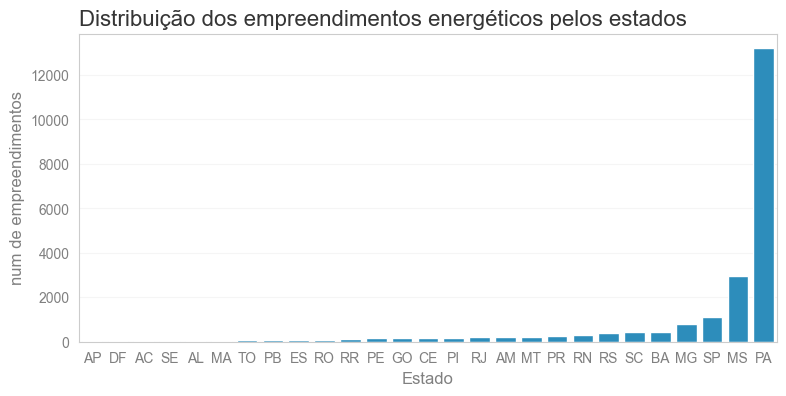

In [97]:
sns.set_style("whitegrid", {"grid.color": "#f5f5f5"})
sns.set_style(rc={"axes.labelcolor": "#808080", "xtick.color": "#808080", "ytick.color": "#808080"})
unique_counts = df.groupby('SigUFPrincipal')['IdeNucleoCEG'].nunique().sort_values()
ax = sns.barplot(x=unique_counts.index, y=unique_counts.values, color='#1696d2')
ax.set_title('Distribuição dos empreendimentos energéticos pelos estados', loc='left', fontsize=16, color="#353535")
ax.set_xlabel('Estado', fontsize=12,  color="#808080")
ax.set_ylabel('num de empreendimentos', fontsize=12,  color="#808080")
ax.figure.set_size_inches(9,4)

In [98]:
unique_counts

SigUFPrincipal
AP       11
DF       24
AC       30
SE       45
AL       50
MA       50
TO       60
PB       67
ES       77
RO       82
RR      143
PE      152
GO      160
CE      161
PI      167
RJ      213
AM      228
MT      231
PR      265
RN      298
RS      382
SC      421
BA      452
MG      790
SP     1119
MS     2951
PA    13191
Name: IdeNucleoCEG, dtype: int64

In [99]:
(df[df['MdaPotenciaFiscalizadaKw'] <= 10])['MdaPotenciaFiscalizadaKw'].count()

16121

In [100]:
df_municipios = df['DscMuninicpios'].value_counts(ascending=False).to_frame()
df_municipios.head(10)

,DscMuninicpios
Portel - PA,5708
Corumbá - MS,2865
Porto de Moz - PA,2288
Curralinho - PA,2210
Tucuruí - PA,1394
Melgaço - PA,1086
Prainha - PA,418
São Paulo - SP,227
Rio de Janeiro - RJ,84
Manacapuru - AM,82


In [101]:
pot_estado_garantida = df.groupby('SigUFPrincipal')['MdaGarantiaFisicaKw'].sum()
df_pot_estado_garantida = pd.DataFrame({'estado': pot_estado_garantida.index, 'potencia_garantida': pot_estado_garantida.values})
df_pot_estado_garantida.head()

,estado,potencia_garantida
0,AC,0.00
1,AL,"46,130.00"
2,AM,"185,700.00"
3,AP,"542,700.00"
4,BA,"6,993,670.00"


Comparativo entre gráficos: Gráfico sem e com tratamento que possuem a mesma base de dados. 

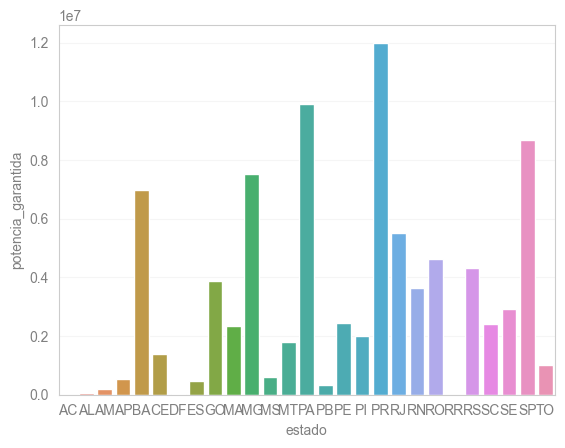

In [102]:
ax2 = sns.barplot(x='estado', y='potencia_garantida', data = df_pot_estado_garantida)

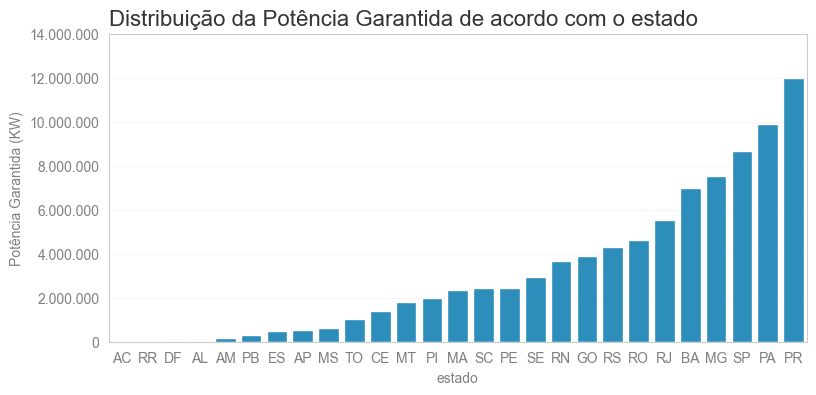

In [103]:
from matplotlib.ticker import ScalarFormatter
ordenado = df_pot_estado_garantida.sort_values('potencia_garantida')
ax2 = sns.barplot(x='estado', y='potencia_garantida', data = df_pot_estado_garantida, order=ordenado['estado'], color='#1696d2')
ax2.set_ylabel('Potência Garantida (KW)')
ax2.set_title('Distribuição da Potência Garantida de acordo com o estado', loc='left', fontsize=16, color="#353535")
ytick_labels = [f'{int(y):,}'.replace(',', '.') for y in ax2.get_yticks()]
ytick_locs = ax2.get_yticks()
ax2.set_yticks(ytick_locs)
ax2.set_yticklabels(ytick_labels)
ax2.figure.set_size_inches(9,4)


In [104]:
pot_estado_fisc = df.groupby('SigUFPrincipal')['MdaPotenciaFiscalizadaKw'].sum()
df_pot_fisc_estado = pd.DataFrame({'estado': pot_estado_fisc.index, 'potencia_fiscalizada': pot_estado_fisc.values})
df_pot_fisc_estado.head()

,estado,potencia_fiscalizada
0,AC,"142,883.00"
1,AL,"782,801.00"
2,AM,"2,086,461.00"
3,AP,"973,705.00"
4,BA,"15,975,508.00"


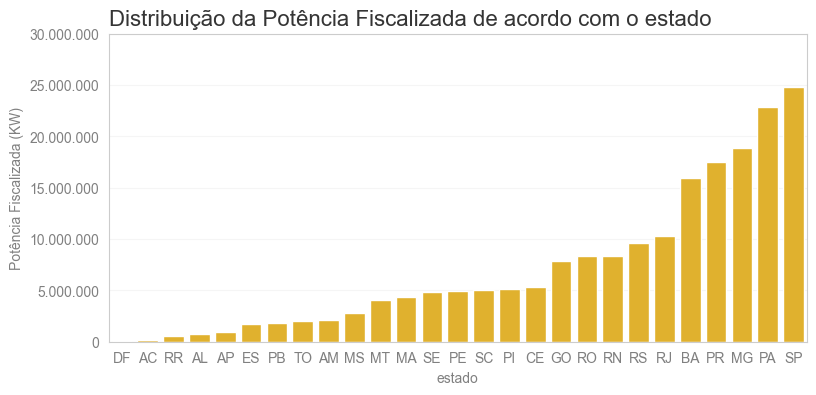

In [105]:
ordenado = df_pot_fisc_estado.sort_values('potencia_fiscalizada')
ax_fisc = sns.barplot(x='estado', y='potencia_fiscalizada', data = df_pot_fisc_estado, order=ordenado['estado'], color='#fdbf11')
ax_fisc.set_ylabel('Potência Fiscalizada (KW)')
ax_fisc.set_title('Distribuição da Potência Fiscalizada de acordo com o estado', loc='left', fontsize=16, color="#353535")
ytick_labels = [f'{int(y):,}'.replace(',', '.') for y in ax_fisc.get_yticks()]
ytick_locs = ax_fisc.get_yticks()
ax_fisc.set_yticks(ytick_locs)
ax_fisc.set_yticklabels(ytick_labels)
ax_fisc.figure.set_size_inches(9,4)

Entendendo a distribuição de energia por estado

In [106]:
df_counts = df.groupby(['SigUFPrincipal', 'SigTipoGeracao']).count()['IdeNucleoCEG'].unstack()

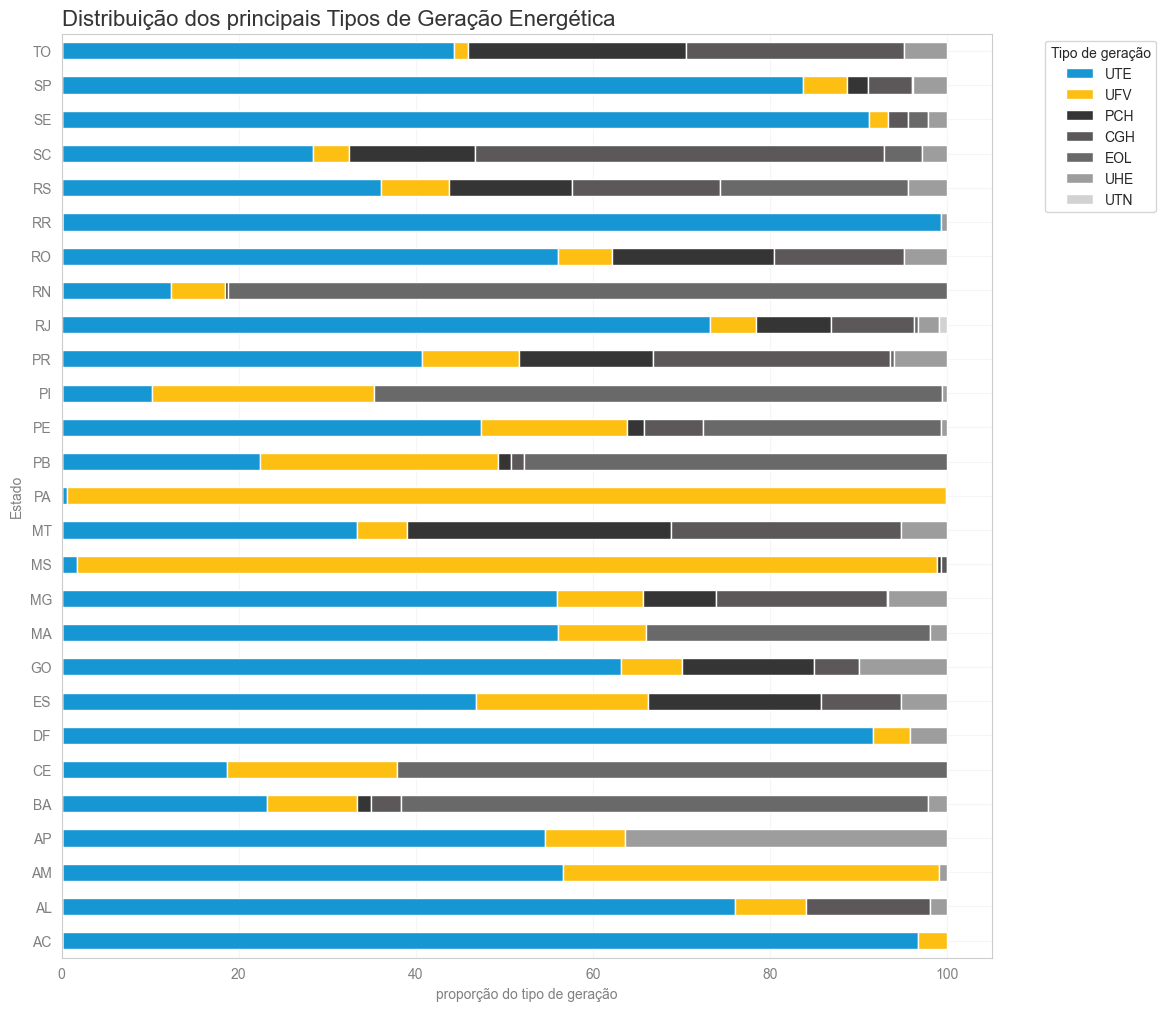

In [107]:
colors=["#1696d2","#fdbf11","#353535","#5c5859","#696969","#9d9d9d", "#d2d2d2"]
ordem_tipo_geração = ['UTE','UFV','PCH','CGH','EOL','UHE','UTN']
ax03=(df_counts.div(df_counts.sum(axis=1), axis=0) * 100).plot.barh(stacked=True, color=colors,y=ordem_tipo_geração)
ax03= plt.xlabel('proporção do tipo de geração')
ax03=plt.ylabel('Estado')
ax03=plt.title('Distribuição dos principais Tipos de Geração Energética',  loc='left', fontsize=16, color="#353535")
ax03=plt.legend(title='Tipo de geração', bbox_to_anchor=(1.05, 1), loc='upper left')
ax03.figure.set_size_inches(12,12)

O gráfico abaixo é o mesmo do grafico apresentado acima, porém sem nenhuma manipulação para melhoria de design.

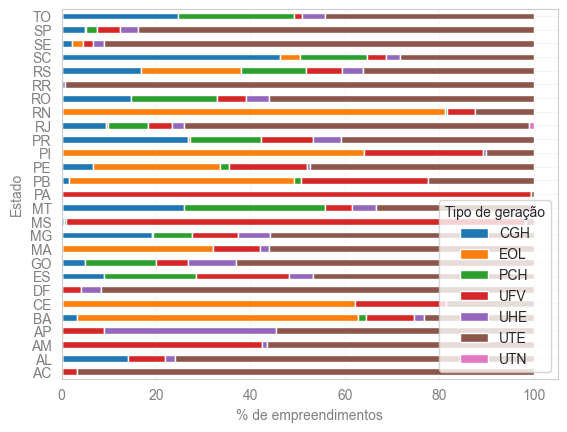

In [108]:
ax03=(df_counts.div(df_counts.sum(axis=1), axis=0) * 100).plot.barh(stacked=True)
plt.xlabel('% de empreendimentos')
plt.ylabel('Estado')
plt.legend(title='Tipo de geração')

Esse grafico acima mostra um dados impressionante, a quantidade de usinas termoelétricas distribuidas pelo país. 

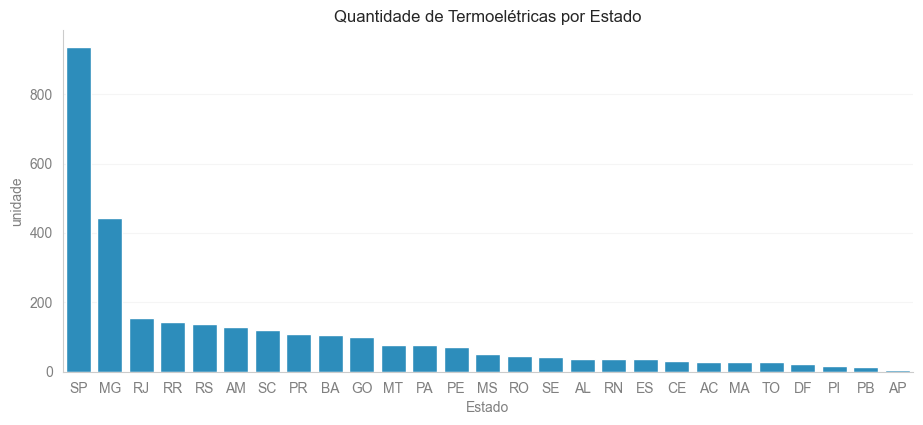

In [109]:
df_termoeletrica = df[df['SigTipoGeracao'] == 'UTE']['SigUFPrincipal'].value_counts().to_frame()
graph_termo = sns.catplot(x='index', y='SigUFPrincipal', kind='bar', data=df_termoeletrica.reset_index(), aspect=3, color="#1696d2")
graph_termo.set(title='Quantidade de Termoelétricas por Estado', xlabel='Estado', ylabel='unidade')
graph_termo.figure.set_size_inches(9,4)



In [110]:
df_termoeletrica = df[df['SigTipoGeracao'] == 'UTE']['SigUFPrincipal'].value_counts().sum()
df_termoeletrica

3027

In [111]:
df_pot_energia = df.groupby('SigTipoGeracao')['MdaPotenciaFiscalizadaKw'].sum().to_frame().reset_index()
# Cria cópia do dataframe df_pot_energia
df_pot_energia_formatted = df_pot_energia.copy()

# Formata a coluna 'MdaPotenciaFiscalizadaKw'
df_pot_energia_formatted['MdaPotenciaFiscalizadaKw_formatted'] = df_pot_energia_formatted['MdaPotenciaFiscalizadaKw'].map('{:,.2f}'.format)

# Cria o dataframe df_pot_energia_table a partir de df_pot_energia_formatted
df_pot_energia_table = df_pot_energia_formatted[['SigTipoGeracao', 'MdaPotenciaFiscalizadaKw_formatted']].copy()

# Renomeia a coluna 'MdaPotenciaFiscalizadaKw_formatted' para 'MdaPotenciaFiscalizadaKw'
df_pot_energia_table = df_pot_energia_table.rename(columns={'MdaPotenciaFiscalizadaKw_formatted': 'MdaPotenciaFiscalizadaKw'})

# Exibe o dataframe df_pot_energia_table
df_pot_energia_table




,SigTipoGeracao,MdaPotenciaFiscalizadaKw
0,CGH,"862,241.00"
1,EOL,"25,053,921.00"
2,PCH,"5,732,357.00"
3,UFV,"8,214,233.00"
4,UHE,"103,195,357.00"
5,UTE,"46,165,457.00"
6,UTN,"1,990,000.00"


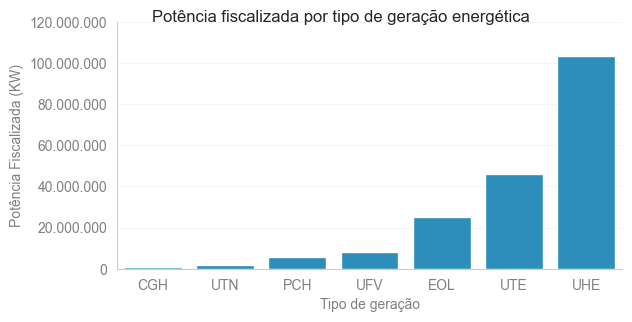

In [112]:
ordem_graph = df_pot_energia.sort_values('MdaPotenciaFiscalizadaKw')
pot_energy_graph = sns.catplot(x='SigTipoGeracao', y='MdaPotenciaFiscalizadaKw',
     kind='bar', data=df_pot_energia, aspect=1, color="#1696d2", order=list(ordem_graph['SigTipoGeracao']))
# Definir rótulos dos eixos
ytick_labels = [f'{int(y):,}'.replace(',', '.') for y in pot_energy_graph.ax.get_yticks()]
ytick_locs = pot_energy_graph.ax.get_yticks()
pot_energy_graph.ax.set_yticks(ytick_locs)
pot_energy_graph.ax.set_yticklabels(ytick_labels)
pot_energy_graph.fig.suptitle('Potência fiscalizada por tipo de geração energética', fontsize=12)
plt.xlabel('Tipo de geração')
plt.ylabel('Potência Fiscalizada (KW)')
pot_energy_graph.figure.set_size_inches(6,3)



In [113]:
df_classificacao_energia = df[['SigTipoGeracao', 'DscOrigemCombustivel', 'DscFonteCombustivel', 
                               'NomFonteCombustivel']].drop_duplicates().sort_values(by=['SigTipoGeracao',
                                                                                          'DscOrigemCombustivel','DscFonteCombustivel', 'NomFonteCombustivel']).reset_index(drop=True)



**Dataframe para mostrar todas as fontes de combustível da matriz energética** (aceito sugestões para melhorar)

- grafico com a quantidade de usinas termeletricas por estado com os dadoscomputados acima
- separar o tipode combustivel de acordo com a sigla de energia; tipo UFV=radiação solar

In [114]:
df_classificacao_energia

,SigTipoGeracao,DscOrigemCombustivel,DscFonteCombustivel,NomFonteCombustivel
0,CGH,Hídrica,Potencial hidráulico,Potencial hidráulico
1,EOL,Eólica,Cinética do vento,Cinética do vento
2,PCH,Hídrica,Potencial hidráulico,Potencial hidráulico
3,UFV,Solar,Radiação solar,Radiação solar
4,UHE,Hídrica,Potencial hidráulico,Potencial hidráulico
5,UTE,Biomassa,Agroindustriais,Bagaço de Cana de Açúcar
6,UTE,Biomassa,Agroindustriais,Biogás-AGR
7,UTE,Biomassa,Agroindustriais,Capim Elefante
8,UTE,Biomassa,Agroindustriais,Casca de Arroz
9,UTE,Biomassa,Biocombustíveis líquidos,Etanol


### Entendendo os Tipos de Energias Renováveis

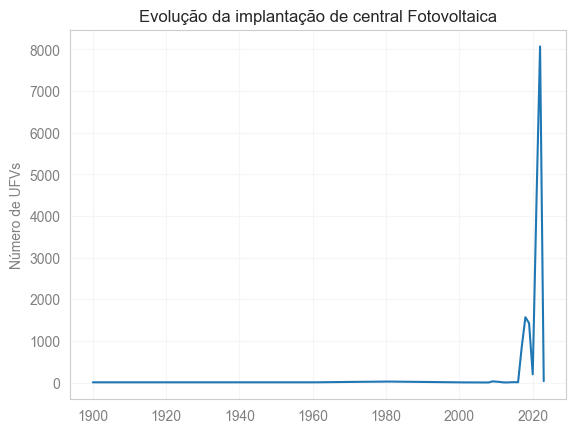

In [115]:
df_ufv = df[df['SigTipoGeracao'] == 'UFV']
df_ufv = df_ufv.assign(Year=pd.DatetimeIndex(df_ufv['DatEntradaOperacao']).year)
df_ufv_count = df_ufv.groupby('Year')['SigTipoGeracao'].count().reset_index(name='Count')
crescimento_solar = sns.lineplot(x='Year', y='Count', data=df_ufv_count)
crescimento_solar.set(xlabel='', ylabel='Número de UFVs', title='Evolução da implantação de central Fotovoltaica')
plt.show()



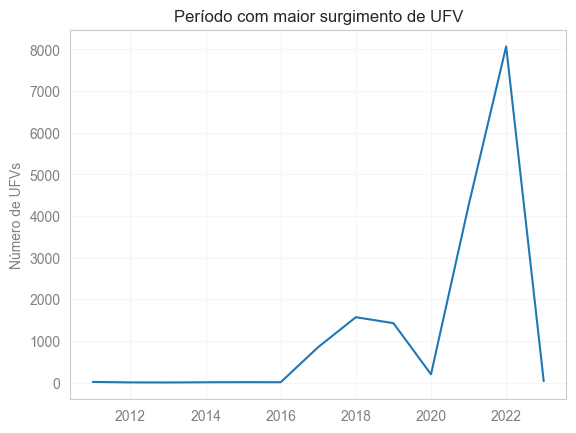

In [116]:
df_ufv = df[df['SigTipoGeracao'] == 'UFV']
df_ufv = df_ufv.assign(Year=pd.DatetimeIndex(df_ufv['DatEntradaOperacao']).year)
df_ufv = df_ufv[df_ufv['Year'] >= 2010] # incluir apenas anos a partir de 2010
df_ufv_count = df_ufv.groupby('Year')['SigTipoGeracao'].count().reset_index(name='Count')
crescimento_solar = sns.lineplot(x='Year', y='Count', data=df_ufv_count)
crescimento_solar.set(xlabel='', ylabel='Número de UFVs', title='Período com maior surgimento de UFV')
plt.show()


In [117]:
pd.options.display.float_format = '{:,.2f}'.format
df[df['SigTipoGeracao'] == 'UFV'].drop('IdeNucleoCEG', axis=1).describe()


,MdaPotenciaOutorgadaKw,MdaPotenciaFiscalizadaKw,MdaGarantiaFisicaKw
count,"16,521.00","16,521.00","16,521.00"
mean,498.59,497.20,89.62
std,"4,443.63","4,431.22","1,082.66"
min,0.26,0.00,0.00
25%,1.00,1.00,0.00
50%,1.00,1.00,0.00
75%,1.00,1.00,0.00
max,"137,480.00","137,480.00","49,200.00"


In [118]:
df_filtered_solar = df.loc[(df['SigTipoGeracao'] == 'UFV') & (df['MdaPotenciaOutorgadaKw'] == 137480), ['NomEmpreendimento','DscMuninicpios', 'SigUFPrincipal', 'DscOrigemCombustivel', 'MdaPotenciaOutorgadaKw', 'MdaPotenciaFiscalizadaKw', 'MdaGarantiaFisicaKw']]
df_filtered_solar


,NomEmpreendimento,DscMuninicpios,SigUFPrincipal,DscOrigemCombustivel,MdaPotenciaOutorgadaKw,MdaPotenciaFiscalizadaKw,MdaGarantiaFisicaKw
5743,Serra do Mel I,Serra do Mel - RN,RN,Solar,"137,480.00","137,480.00","49,200.00"


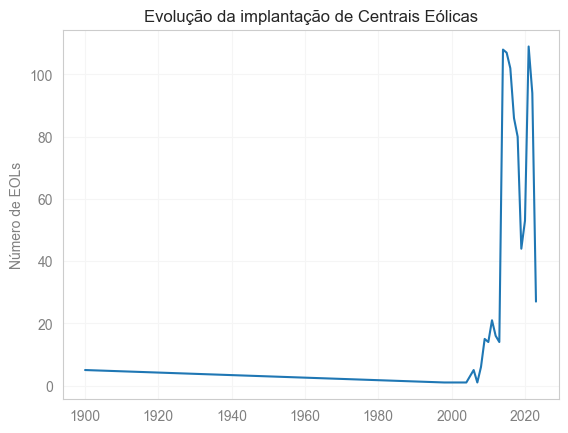

In [119]:
df_eol = df[df['SigTipoGeracao'] == 'EOL']
df_eol = df_eol.assign(Year=pd.DatetimeIndex(df_eol['DatEntradaOperacao']).year)
df_eol_count = df_eol.groupby('Year')['SigTipoGeracao'].count().reset_index(name='Count')
crescimento_eolica = sns.lineplot(x='Year', y='Count', data=df_eol_count)
crescimento_eolica.set(xlabel='', ylabel='Número de EOLs', title='Evolução da implantação de Centrais Eólicas')
plt.show()

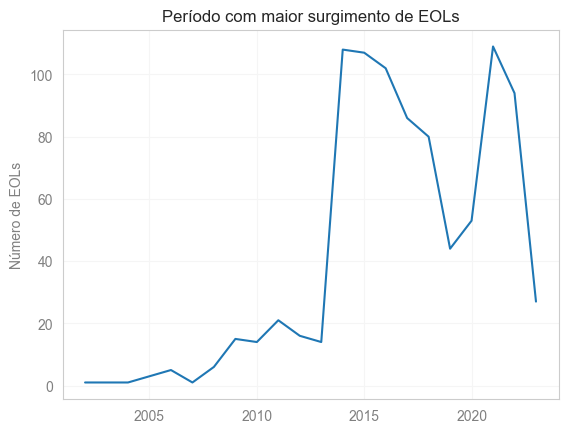

In [120]:
df_eol = df[df['SigTipoGeracao'] == 'EOL']
df_eol = df_eol.assign(Year=pd.DatetimeIndex(df_eol['DatEntradaOperacao']).year)
df_eol = df_eol[df_eol['Year'] >= 2000] # incluir apenas anos a partir de 2000
df_eol_count = df_eol.groupby('Year')['SigTipoGeracao'].count().reset_index(name='Count')
crescimento_eolica = sns.lineplot(x='Year', y='Count', data=df_eol_count)
crescimento_eolica.set(xlabel='', ylabel='Número de EOLs', title='Período com maior surgimento de EOLs')
plt.show()

In [121]:
pd.options.display.float_format = '{:,.2f}'.format
df[df['SigTipoGeracao'] == 'EOL'].drop('IdeNucleoCEG', axis=1).describe()

,MdaPotenciaOutorgadaKw,MdaPotenciaFiscalizadaKw,MdaGarantiaFisicaKw
count,911.00,911.00,911.00
mean,"27,844.59","27,501.56","11,860.55"
std,"12,852.25","12,498.90","7,494.38"
min,0.16,0.00,0.00
25%,"21,000.00","21,000.00","7,700.00"
50%,"28,200.00","28,050.00","12,290.00"
75%,"30,400.00","30,240.00","15,500.00"
max,"105,000.00","105,000.00","44,700.00"


In [122]:
df_filtered = df.loc[(df['SigTipoGeracao'] == 'EOL') & (df['MdaPotenciaOutorgadaKw'] == 105000), ['NomEmpreendimento','DscMuninicpios', 'SigUFPrincipal', 'DscOrigemCombustivel', 'MdaPotenciaOutorgadaKw', 'MdaPotenciaFiscalizadaKw', 'MdaGarantiaFisicaKw']]
df_filtered

,NomEmpreendimento,DscMuninicpios,SigUFPrincipal,DscOrigemCombustivel,MdaPotenciaOutorgadaKw,MdaPotenciaFiscalizadaKw,MdaGarantiaFisicaKw
1071,Praia Formosa,Camocim - CE,CE,Eólica,"105,000.00","105,000.00","28,830.00"
